In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, log_loss

In [10]:
dataset = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/refs/heads/main/datasets/breast_cancer.csv"

data = pd.read_csv(dataset, index_col=0)

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
ss = StandardScaler()

X_train[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = ss.transform(X_test[X_test.columns])

In [20]:
from datetime import datetime

log_losses = []

model = SGDClassifier(loss="log_loss", max_iter=1000, tol=0.001, validation_fraction=0.1, n_iter_no_change=5)

epochs = 100
batch_size = [16, 32, 64, 128, 256]

start_time = datetime.now()

for bs in batch_size:
    print(f"Training with batch size: {bs}:\n")

    for epoch in range(epochs):
        # Shuffle the training set
        X_train, y_train = shuffle(X_train, y_train)

        for i in range(0, len(X_train), bs):

            # Get the current batch
            X_batch = X_train[i:i+bs]
            y_batch = y_train[i:i+bs]

            # Fit the model on the current batch
            model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

            # Evaluate the model
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)

            # Compute the loss and accuracy
            loss = log_loss(y_test, y_proba)
            accuracy = accuracy_score(y_test, y_pred)

            log_losses.append(loss)


            print(f"Epoch: {epoch} - Loss: {loss}, Accuracy: {accuracy}")

end_time = datetime.now()
print(f"Training time: {end_time-start_time}")

Training with batch size: 16:

Epoch: 0 - Loss: 0.3376984358224149, Accuracy: 0.98
Epoch: 0 - Loss: 1.5136092425977195, Accuracy: 0.91
Epoch: 0 - Loss: 0.5217740652800351, Accuracy: 0.98
Epoch: 0 - Loss: 0.5223553766534041, Accuracy: 0.98
Epoch: 0 - Loss: 3.3969532736872723, Accuracy: 0.89
Epoch: 0 - Loss: 3.3886031023142795, Accuracy: 0.89
Epoch: 0 - Loss: 0.964397073315368, Accuracy: 0.97
Epoch: 0 - Loss: 3.2699923435999647, Accuracy: 0.89
Epoch: 0 - Loss: 3.4046123573455755, Accuracy: 0.88
Epoch: 0 - Loss: 0.5406531251925903, Accuracy: 0.98
Epoch: 0 - Loss: 0.5356664190804208, Accuracy: 0.98
Epoch: 0 - Loss: 0.446467632612252, Accuracy: 0.97
Epoch: 0 - Loss: 0.43915582544995013, Accuracy: 0.97
Epoch: 0 - Loss: 0.8083535554381723, Accuracy: 0.96
Epoch: 0 - Loss: 1.354145710570341, Accuracy: 0.95
Epoch: 0 - Loss: 0.8077104009359671, Accuracy: 0.97
Epoch: 0 - Loss: 2.214369437965473, Accuracy: 0.92
Epoch: 0 - Loss: 2.2094556067841795, Accuracy: 0.92
Epoch: 0 - Loss: 2.1977322544914153,

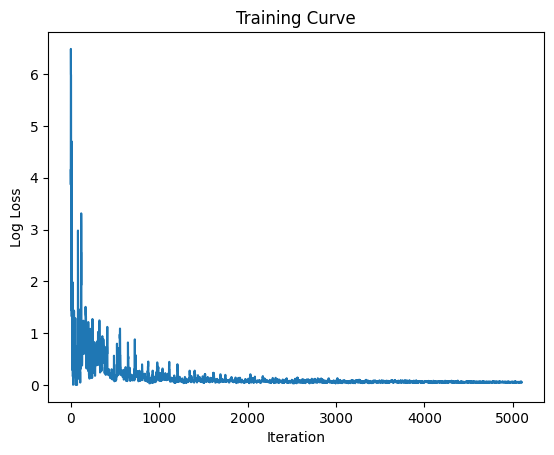

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_curve():

    plt.plot(log_losses)

    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.title("Training Curve")

    plt.show()

plot_training_curve()
